<a href="https://colab.research.google.com/github/Svetorus/Data-analysis-algorithms/blob/master/Algoritm_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 6. Градиентный бустинг

In [0]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [0]:
from sklearn.datasets import load_diabetes

In [0]:
X, y = load_diabetes(return_X_y=True)

In [0]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

Напишем функцию, реализующую предсказание в градиентном бустинге.

In [0]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функицию.

In [0]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [0]:
def bias(y, z):
    return (y - z)

Реализуем функцию обучения градиентного бустинга.

In [0]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

Теперь обучим несколько моделей с разными параметрами и исследуем их поведение.

In [0]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [0]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [11]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1009.7509803173443
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 6302.191667325721


In [0]:
import matplotlib.pyplot as plt

In [0]:
# Число деревьев в ансамбле
n_trees = 25

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [0]:
train_err = []
test_err = []

for n_tree in range(n_trees):
  trees, train_errors, test_errors = gb_fit(n_tree, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
  train_prediction = gb_predict(X_train, trees, coefs, eta)
  train_err.append(mean_squared_error(y_train, train_prediction))

  test_prediction = gb_predict(X_test, trees, coefs, eta)
  test_err.append(mean_squared_error(y_test, test_prediction))

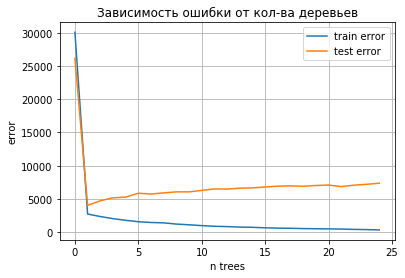

In [15]:
# График зависимости ошибки от кол-ва деревьев (от 1 до 25) при eta = 1, max_depth = 3

plt.plot(range(n_trees), train_err, label='train error')
plt.plot(range(n_trees), test_err, label='test error')

plt.xlabel('n trees')
plt.ylabel('error')
plt.legend(loc='best')
plt.title('Зависимость ошибки от кол-ва деревьев')
plt.grid()
plt.show()

In [0]:
# Максимальная глубина деревьев
max_depth = 20

train_err = []
test_err = []

for depth in range(1, max_depth):
  trees, train_errors, test_errors = gb_fit(n_trees, depth, X_train, X_test, y_train, y_test, coefs, eta)
  train_prediction = gb_predict(X_train, trees, coefs, eta)
  train_err.append(mean_squared_error(y_train, train_prediction))

  test_prediction = gb_predict(X_test, trees, coefs, eta)
  test_err.append(mean_squared_error(y_test, test_prediction))

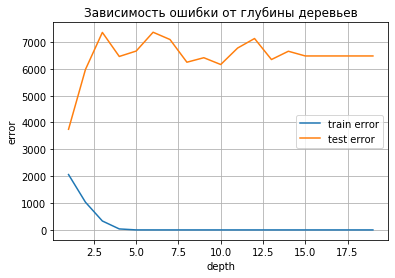

In [17]:
# График зависимости ошибки от глубины деревьев (от 1 до 20) при eta = 1, n_trees = 25

plt.plot(range(1, max_depth), train_err, label='train error')
plt.plot(range(1, max_depth), test_err, label='test error')

plt.xlabel('depth')
plt.ylabel('error')
plt.legend(loc='best')
plt.title('Зависимость ошибки от глубины деревьев')
plt.grid()
plt.show()